<a href="https://colab.research.google.com/github/PiyushRaj282/Portfolio/blob/main/Online_advertising_performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [ ]:
df = pd.read_csv('online_advertising_performance_data.csv')

In [ ]:
engagement_count = df['user_engagement'].value_counts()
print(engagement_count)

user_engagement
Medium    5489
Low       5035
High      4884
Name: count, dtype: int64


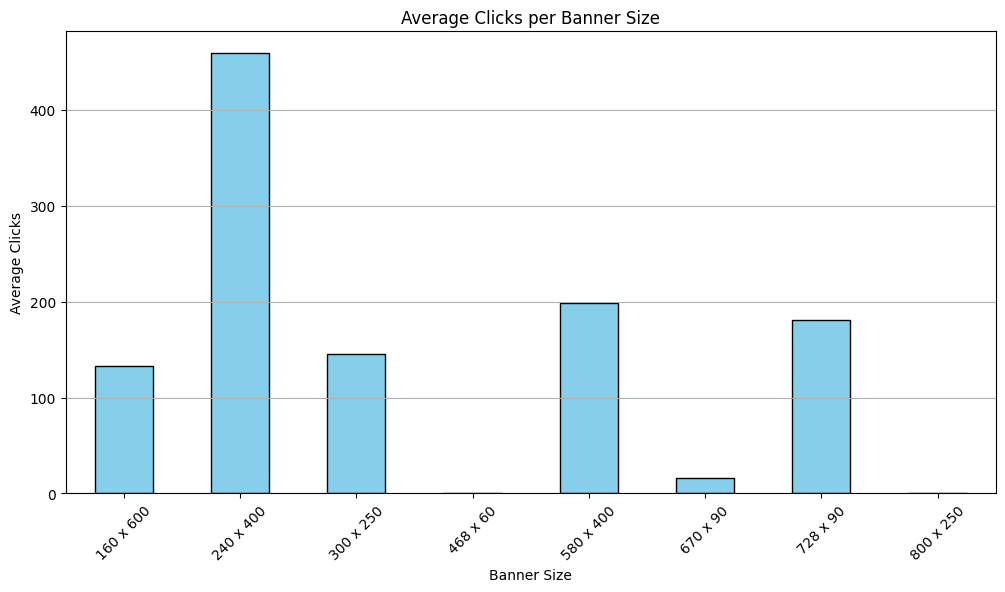

banner
160 x 600    132.725762
240 x 400    459.074639
300 x 250    145.820567
468 x 60       0.681938
580 x 400    199.143564
670 x 90      15.817602
728 x 90     181.287715
800 x 250      0.033426
Name: clicks, dtype: float64


In [ ]:
banner_clicks = df.groupby("banner")["clicks"].mean()

plt.figure(figsize=(12, 6))
banner_clicks.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Average Clicks per Banner Size")
plt.xlabel("Banner Size")
plt.ylabel("Average Clicks")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()

print(banner_clicks)

In [ ]:
highest_display = df.groupby("placement")["displays"].sum()
highest_clicks = df.groupby("placement")["clicks"].sum()

print(f"Placement with the highest displays: {highest_display.idxmax()} ({highest_display.max()} displays)")
print(f"Placement with the highest clicks: {highest_clicks.idxmax()} ({highest_clicks.max()} clicks)")

Placement with the highest displays: mno (143161775 displays)
Placement with the highest clicks: ghi (1247049 clicks)


In [ ]:
corr = df["cost"].corr(df["revenue"])
print(f"Correlation between cost and revenue: {corr}")

Correlation between cost and revenue: 0.7605199343382271


In [ ]:
revenue_click_avg = df["revenue"].sum() / df["clicks"].sum()
print(f"Average revenue per click: {revenue_click_avg}")

Average revenue per click: 0.1108233559193802


In [ ]:
df_clicks_greater_than_0 = df[df["clicks"] > 0].copy()

df_clicks_greater_than_0["post_click_conversion_rate"] = (df_clicks_greater_than_0["post_click_conversions"] / df_clicks_greater_than_0["clicks"]) * 100

highest_conversion_campaign = df_clicks_greater_than_0.groupby("campaign_number")["post_click_conversion_rate"].mean().idxmax()
highest_conversion_rate = df_clicks_greater_than_0.groupby("campaign_number")["post_click_conversion_rate"].mean().max()

print(f"Campaign with the highest post-click conversion rate: {highest_conversion_campaign} ({highest_conversion_rate:.2f}%)")


Campaign with the highest post-click conversion rate: camp 1 (35.70%)


month
April    1.319614e+07
June     7.801759e+06
May      1.171772e+07
Name: post_click_sales_amount, dtype: float64


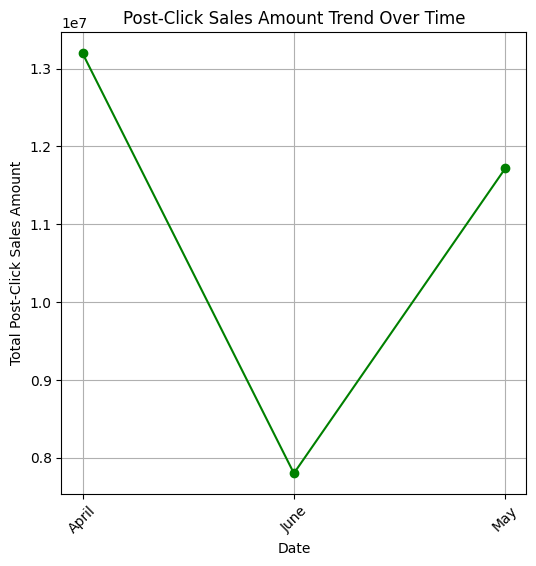

In [ ]:
sales_trend = df.groupby("month")["post_click_sales_amount"].sum()
print(sales_trend)
plt.figure(figsize=(6, 6))
plt.plot(sales_trend.index, sales_trend.values, marker="o", linestyle="-", color="green")
plt.title("Post-Click Sales Amount Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Total Post-Click Sales Amount")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [ ]:
banner_engagement = df.groupby("banner")["user_engagement"].value_counts().sort_values(ascending=False)
print(banner_engagement)

banner     user_engagement
728 x 90   Medium             1117
           High               1018
           Low                1007
300 x 250  Medium              999
           Low                 949
           High                872
240 x 400  Low                 848
           Medium              848
670 x 90   Medium              847
           Low                 777
240 x 400  High                729
670 x 90   High                728
468 x 60   Medium              699
160 x 600  Medium              642
468 x 60   High                637
160 x 600  Low                 590
           High                573
468 x 60   Low                 563
580 x 400  Low                 212
           Medium              212
           High                182
800 x 250  High                145
           Medium              125
           Low                  89
Name: count, dtype: int64


In [ ]:
df_clicks_greater_than_0 = df[df["clicks"] > 0].copy()

df_clicks_greater_than_0["post_click_conversion_rate"] = (df_clicks_greater_than_0["post_click_conversions"] / df_clicks_greater_than_0["clicks"]) * 100

highest_conversion_campaign = df_clicks_greater_than_0.groupby("placement")["post_click_conversion_rate"].mean().idxmax()
highest_conversion_rate = df_clicks_greater_than_0.groupby("placement")["post_click_conversion_rate"].mean().max()

print(f"Placement with the highest post-click conversion rate: {highest_conversion_campaign} ({highest_conversion_rate:.2f}%)")


Placement with the highest post-click conversion rate: abc (30.20%)


In [ ]:
engagement_mapping = {"Low": 0, "Medium": 1, "High": 2}
df["user_engagement_encoded"] = df["user_engagement"].map(engagement_mapping)

correlation = df["user_engagement_encoded"].corr(df["revenue"])
print(f"Correlation between user engagement and revenue: {correlation}")

Correlation between user engagement and revenue: 0.1753892426950314


In [ ]:
campaign_effectiveness = df.groupby(["banner", "placement"])["user_engagement"].value_counts().unstack()

campaign_effectiveness

user_engagement       High    Low  Medium
banner    placement                      
160 x 600 abc         91.0   39.0    77.0
          def        152.0  182.0   182.0
          ghi        152.0  182.0   182.0
          jkl          NaN    NaN     1.0
          mno        152.0  183.0   182.0
240 x 400 def        183.0  212.0   212.0
          ghi        182.0  212.0   212.0
          jkl        182.0  212.0   212.0
          mno        182.0  212.0   212.0
300 x 250 abc        140.0  110.0   146.0
          def        182.0  212.0   212.0
          ghi        182.0  212.0   212.0
          jkl        182.0  200.0   212.0
          mno        182.0  212.0   212.0
468 x 60  def        182.0  203.0   212.0
          ghi        177.0  146.0   211.0
          jkl         96.0    3.0    64.0
          mno        182.0  211.0   212.0
580 x 400 mno        182.0  212.0   212.0
670 x 90  def        182.0  212.0   212.0
          ghi        182.0  212.0   212.0
          jkl        182.0  141.0   211.0
          mno        182.0  212.0   212.0
728 x 90  abc        145.0   90.0   130.0
          def        182.0  212.0   212.0
          ghi        182.0  212.0   212.0
          jkl        182.0  212.0   212.0
          mno        182.0  212.0   212.0
800 x 250 ghi         10.0    NaN     NaN
          mno        135.0   89.0   125.0

In [ ]:
df["ROI"] = ((df["revenue"] - df["cost"]) / df["cost"]) * 100

roi_analysis = df.groupby(["banner", "campaign_number"])["ROI"].mean().reset_index()

top_roi = roi_analysis.sort_values(by="ROI", ascending=False)
print(top_roi)

       banner campaign_number         ROI
23  800 x 250          camp 3         inf
2   160 x 600          camp 3  309.675736
0   160 x 600          camp 1  293.191051
13  580 x 400          camp 2  211.367802
14  580 x 400          camp 3  200.425514
3   240 x 400          camp 1  153.118730
6   300 x 250          camp 1  117.172481
12  580 x 400          camp 1  107.033428
4   240 x 400          camp 2   90.661139
16   670 x 90          camp 2   85.174113
17   670 x 90          camp 3   80.312573
9    468 x 60          camp 1   68.666006
15   670 x 90          camp 1   67.281021
7   300 x 250          camp 2   66.325052
18   728 x 90          camp 1   65.927427
8   300 x 250          camp 3   53.061350
1   160 x 600          camp 2   51.129118
11   468 x 60          camp 3   47.104257
19   728 x 90          camp 2   26.788212
5   240 x 400          camp 3   22.335918
20   728 x 90          camp 3   13.475635
10   468 x 60          camp 2    9.681525
22  800 x 250          camp 2   -8

In [ ]:
conversion_dist = df.groupby("placement")["post_click_conversions"].sum()
conversion_perc = (conversion_dist / conversion_dist.sum()) * 100

print(conversion_perc)

placement
abc     0.126426
def     4.580785
ghi    51.715340
jkl     3.199461
mno    40.377988
Name: post_click_conversions, dtype: float64


In [ ]:
df["date"] = pd.to_datetime("2024-" + df["month"].astype(str) + "-" + df["day"].astype(str), errors="coerce")

df["day_of_week"] = df["date"].dt.dayofweek

df["weekend_flag"] = df["day_of_week"].apply(lambda x: "Weekend" if x >= 5 else "Weekday")

engagement_comparison = df.groupby("weekend_flag")["user_engagement"].value_counts().unstack()

print(engagement_comparison)


user_engagement  High   Low  Medium
weekend_flag                       
Weekday          3481  3603    3930
Weekend          1403  1432    1559


In [ ]:
cpc_analysis = df.groupby(["campaign_number", "banner"]).agg(
    total_cost=("cost", "sum"),
    total_clicks=("clicks", "sum")
).reset_index()

cpc_analysis["CPC"] = cpc_analysis["total_cost"] / cpc_analysis["total_clicks"]
cpc_analysis.replace([float("inf"), float("-inf")], None, inplace=True)

cpc_analysis = cpc_analysis.sort_values(by="CPC", ascending=False)

cpc_analysis


,campaign_number,banner,total_cost,total_clicks,CPC
7,camp 1,800 x 250,2.5866,4,0.646650
3,camp 1,468 x 60,172.2626,602,0.286150
5,camp 1,670 x 90,3387.2404,20967,0.161551
4,camp 1,580 x 400,7806.7751,49559,0.157525
2,camp 1,300 x 250,30949.2510,212008,0.145982
0,camp 1,160 x 600,15067.7689,106240,0.141828
6,camp 1,728 x 90,46646.6067,338423,0.137835
1,camp 1,240 x 400,46656.0885,681333,0.068478
17,camp 3,240 x 400,2459.2446,44426,0.055356
19,camp 3,468 x 60,6.9830,163,0.042840


In [ ]:
cost_effectiveness = df.groupby(["campaign_number", "placement"]).agg(
    total_cost=("cost", "sum"),
    total_conversions=("post_click_conversions", "sum")
).reset_index()

cost_effectiveness["cost_per_conversion"] = cost_effectiveness["total_cost"] / cost_effectiveness["total_conversions"]
cost_effectiveness.replace([float("inf"), float("-inf")], None, inplace=True)

cost_effectiveness = cost_effectiveness.sort_values(by="cost_per_conversion", ascending=True)

most_cost_effective = cost_effectiveness.dropna().iloc[0]  # Lowest cost per conversion
least_cost_effective = cost_effectiveness.dropna().iloc[-1]  # Highest cost per conversion

most_cost_effective, least_cost_effective

(campaign_number          camp 1
 placement                   abc
 total_cost              98.3361
 total_conversions           808
 cost_per_conversion    0.121703
 Name: 0, dtype: object,
 campaign_number          camp 3
 placement                   def
 total_cost             903.5398
 total_conversions           468
 cost_per_conversion    1.930641
 Name: 11, dtype: object)

In [ ]:
df["day"] = df["day"].astype(str)

conversion_rate_by_day = df.groupby("day").agg(
    total_conversions=("post_click_conversions", "sum"),
    total_clicks=("clicks", "sum")
).reset_index()

conversion_rate_by_day["conversion_rate"] = conversion_rate_by_day["total_conversions"] / conversion_rate_by_day["total_clicks"]
conversion_rate_by_day = conversion_rate_by_day.sort_values(by="conversion_rate", ascending=False)

conversion_rate_by_day

,day,total_conversions,total_clicks,conversion_rate
24,31,7307,18021,0.405471
15,23,19101,57515,0.332105
16,24,18193,58576,0.310588
13,21,19823,68380,0.289895
8,17,22130,76716,0.288467
7,16,23085,80495,0.286788
12,20,21071,73577,0.286380
1,10,24087,84268,0.285838
23,30,18302,64130,0.285389
14,22,18810,66010,0.284957


In [ ]:
campaign_engagement_conversion = df.groupby(["campaign", "user_engagement"]).agg(
    total_conversions=("post_click_conversions", "sum")
).reset_index()

campaign_engagement_conversion = campaign_engagement_conversion.sort_values(
    by="total_conversions", ascending=False
)

campaign_engagement_conversion

KeyError: 'campaign'